In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from PIL import Image


# Solution for task 1 (Lasso) of lab assignment - FDA SS23 by [Bartosz Krajewski]




# Task 1.1 Is it possible to solve the lasso optimisation problem analytically? Explain. (3 points)

Yes it is possible  

In [3]:
#  load data (change path if necessary)
df = pd.read_csv("lasso_data.csv")

In [4]:
columns = ['X1','X2','X3','X4','X5','X6']
label =['y']

In [5]:
X = df[columns]
y = df[label]
y
scores = pd.DataFrame()

# Task 1.2 Split the data into a train and a test set with appropriate test size. (2 points)


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
print(X_train.shape); print(X_test.shape)



(1500, 6336)
(500, 6336)


# Task 1.3 Fit a linear regression model for Y using all remaining variables on the training data. (5 points)


In [7]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)

0.9920848562751585
[[ 3.00758594e+00  1.00196108e+00 -3.03883050e-04  1.00196108e+00
  -2.00206643e+00 -1.04267519e-03]]



# Task 1.4 Make a model prediction on unseen data and assess model performance using a suitable metric. (5 points)

In [8]:

y_training_pred = reg.predict(X_train)
print(y_training_pred)
mse_training = mean_squared_error(y_train, y_training_pred)
r2_training = r2_score(y_train, y_training_pred)

print("Mean squared error: {:.2f}".format(mse_training))
print("R^2 score: {:.2f}".format(r2_training))


y_test_pred = reg.predict(X_test)
print(y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean squared error: {:.2f}".format(mse_test))
print("R^2 score: {:.2f}".format(r2_test))
scores['linear_model'] = [mse_test, r2_test]


[[-18.05989669]
 [ -0.12886708]
 [ -5.98064666]
 ...
 [ 12.09428139]
 [  0.05903533]
 [  8.3511596 ]]
Mean squared error: 0.99
R^2 score: 0.99
[[-4.5746394 ]
 [ 4.96620411]
 [-3.72523477]
 ...
 [-3.24947989]
 [-7.02456222]
 [ 3.71069855]]
Mean squared error: 1.03
R^2 score: 0.99


# Task 1.5 Perform lasso regression using the same data as in task 1.3 (6 points)

In [9]:
# https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d #
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2']
    return cv_accuracies, maes, mses, r2s

In [10]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg1 = Lasso(alpha=0.01)
lasso_reg2 = Lasso(alpha=0.1)
lasso_reg3 = Lasso(alpha=0.2)
models = [lasso_reg, lasso_reg1, lasso_reg2, lasso_reg3]


comp, maes, mses, r2s = cv_comparison(models, X_train, y_train, 4)
comp

,Lasso(alpha=0.001),Lasso(alpha=0.01),Lasso(alpha=0.1),Lasso(alpha=0.2)
Mean Absolute Error,0.7930,0.7930,0.7978,0.8126
Mean Squared Error,0.9892,0.9893,1.0021,1.0408
R^2,0.9922,0.9922,0.9921,0.9918


I have chosen alpha = 0.01, because mean squared error is low enough and R^2 value is close to 1

In [36]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train) 
pred_train_lasso= lasso_reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1.000905524525255
0.9920901661528703
1.0206167913565658
0.9915086922459957


# Task 1.6 Compare model performance to the original linear model by using the same metric and test set as in 1.4.
# What do you observe? (2 points)

In [37]:

y_lasso_test_pred = lasso_reg.predict(X_test)
print(y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean squared error: {:.2f}".format(mse_test))
print("R^2 score: {:.2f}".format(r2_test))
scores['lasso_model'] = [mse_test, r2_test]
scores.index = ['Mean Squared Error', 'R^2']

scores

[[-4.5746394 ]
 [ 4.96620411]
 [-3.72523477]
 ...
 [-3.24947989]
 [-7.02456222]
 [ 3.71069855]]
Mean squared error: 1.03
R^2 score: 0.99


,linear_model,lasso_model
Mean Squared Error,1.025501,1.025501
R^2,0.991640,0.991640


In [38]:
coef = pd.DataFrame()
coef['linear_model'] = reg.coef_[0]
print(reg.coef_[0])
print(lasso_reg.coef_)
coef['lasso_model'] = lasso_reg.coef_
coef.index = ['X1', 'X2' , 'X3', 'X4','X5' , 'X6']
coef


[ 3.00758594e+00  1.00196108e+00 -3.03883050e-04  1.00196108e+00
 -2.00206643e+00 -1.04267519e-03]
[ 2.90753193e+00  1.97872572e+00 -5.66899876e-05  1.24289829e-06
 -1.99810548e+00 -0.00000000e+00]


,linear_model,lasso_model
X1,3.007586,2.907532
X2,1.001961,1.978726
X3,-0.000304,-0.000057
X4,1.001961,0.000001
X5,-2.002066,-1.998105
X6,-0.001043,-0.000000


In [4]:
# Solution for task 2 (Image Classifier) of lab assignment for FDA SS23 by [Bartosz Krajewski]
# imports here
import numpy as np   # essential for everything
import pandas as pd   # data structure
import matplotlib.pyplot as plt   # plots
#import seaborn as sns   # fanc plots
import sklearn   # standard machine learning
import keras   # neural networks (frontend for tensorflow)
from keras.models import Sequential  # simplest way to set up neural network model 
from keras.layers import Dense  # fully connected layer
from tensorflow.keras.optimizers import SGD  # stochastic gradient descent
import tensorflow as tf  # backend, we only use it to set random seed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models

from tensorflow.keras.callbacks import EarlyStopping


In [15]:

# define additional functions here
# check that the input has the correct shape

# --------------------------
# add your data preprocessing, model definition, training and prediction between these lines


n_classes = y_train['y'].nunique()
model = Sequential()
model.add(Dense(6335, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
            optimizer=SGD(learning_rate=0.01), 
            metrics=['accuracy'])

model.summary()
# --------------------------


model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=10, verbose=0)
#y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred = model.predict(X_test)

# test that the returned prediction has correct shape


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6335)              40144895  
                                                                 
 dense_13 (Dense)            (None, 40)                253440    
                                                                 
Total params: 40,398,335
Trainable params: 40,398,335
Non-trainable params: 0
_________________________________________________________________
13/13 [==============================] - 1s 36ms/step


In [214]:
print(X_train.shape)
print(y_train.shape)

(1800, 6336)
(1800, 1)


In [262]:
model = keras.Sequential([
    keras.layers.Flatten(),  # input layer (1)
    keras.layers.Dense(600, activation='relu'),  #  hidden layer (2)

    keras.layers.Dense(40, activation='softmax') # output layer (3)
])

In [260]:
print(X_train.min())
print(X_train.max())

0       6.0
1       6.0
2       8.0
3       6.0
4       6.0
       ... 
6331    5.0
6332    4.0
6333    0.0
6334    5.0
6335    3.0
Length: 6336, dtype: float64
0       255.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
6331    255.0
6332    255.0
6333    255.0
6334    255.0
6335    255.0
Length: 6336, dtype: float64


In [270]:
w = pd.get_dummies(y_train)
y_train = pd.get_dummies(y_train)

y_train

,y
238,4
1035,9
1821,3
713,32
1546,15
...,...
739,36
988,25
102,26
1445,31


In [263]:
X_train = X_train /255.0
X_test = X_test / 255.0
# y_train['y'] = pd.get_dummies(y_train)
# y_test[y] = pd.get_dummies(y_test)
y_test

,y
324,10
1414,2
1365,35
1132,26
1222,2
...,...
689,13
460,12
124,2
967,23


In [226]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [364]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])

# --------------------------


history = model.fit(X_train , y_train, epochs=80 ,verbose=1)

Epoch 1/80


ValueError: in user code:

    File "e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_60" is incompatible with the layer: expected shape=(None, 48, 44, 3), found shape=(32, 6336)


In [255]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 6ms/step - loss: 40.4939 - accuracy: 0.7875
Test accuracy: 0.7875000238418579


In [5]:
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")


In [7]:
X_nmp = X.to_numpy()
X_nmp = X_nmp.reshape(2000,44, 48, 3)

X_train, X_test, y_train, y_test = train_test_split(X_nmp, y, test_size = 0.2)

X_train = X_train /255
X_test = X_test / 255

#X_nmp.reshape(2000,48,43,3)
X_train
drop_rate = 0.5

In [378]:

X_train = pd.DataFrame(X_train)

ValueError: Must pass 2-d input. shape=(1600, 44, 48, 3)

(44, 48, 3)


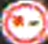

In [9]:
print(X_nmp[66].shape)
array = np.array(X_nmp[19], dtype=np.uint8)
img = Image.fromarray(array)
img

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(90, (3, 3), activation='relu', input_shape=(44, 48,3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(drop_rate))
model.add(layers.Conv2D(90, (4, 4), activation='relu', input_shape=(44, 48,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(180, (3, 3) , activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(drop_rate))
model.add(layers.Conv2D(180, (3,3), activation="relu", kernel_initializer="he_normal", strides=2, padding="same"))
model.add(layers.Flatten())  # input layer (1)
model.add(layers.Dense(2700, activation='relu')) #  hidden layer (2)

model.add(layers.Dense(40, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 46, 90)        2520      
                                                                 
 batch_normalization (BatchN  (None, 42, 46, 90)       360       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 42, 46, 90)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 43, 90)        129690    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 21, 90)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 19, 21, 90)       3

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(90, (3, 3), activation='relu', input_shape=(44, 48,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(180, (3, 3) , activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(180, (2, 2) , activation='relu'))
model.add(layers.Flatten())  # input layer (1)
model.add(layers.Dense(2700, activation='relu')) #  hidden layer (2)

model.add(layers.Dense(40, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 42, 46, 90)        2520      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 23, 90)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 21, 180)       145980    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 10, 180)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 9, 180)         129780    
                                                                 
 flatten_1 (Flatten)         (None, 12960)            

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
stop = EarlyStopping(monitor="accuracy", min_delta=0, patience=30, restore_best_weights=True)


In [29]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])

# --------------------------


history = model.fit(X_train , y_train, epochs=50 , verbose=1, batch_size= 16,  validation_data=(X_test, y_test), callbacks= [stop])

Epoch 1/50
100/100 [==============================] - 78s 676ms/step - loss: 0.9648 - accuracy: 0.7156 - val_loss: 0.6936 - val_accuracy: 0.8100
Epoch 2/50
100/100 [==============================] - 62s 617ms/step - loss: 0.3782 - accuracy: 0.8950 - val_loss: 0.6250 - val_accuracy: 0.8300
Epoch 3/50
100/100 [==============================] - 61s 608ms/step - loss: 0.1806 - accuracy: 0.9488 - val_loss: 0.5668 - val_accuracy: 0.8650
Epoch 4/50
100/100 [==============================] - 62s 624ms/step - loss: 0.0853 - accuracy: 0.9769 - val_loss: 0.4491 - val_accuracy: 0.9225
Epoch 5/50
100/100 [==============================] - 61s 607ms/step - loss: 0.0949 - accuracy: 0.9719 - val_loss: 0.4983 - val_accuracy: 0.8875
Epoch 6/50
100/100 [==============================] - 61s 615ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.6488 - val_accuracy: 0.8875
Epoch 7/50
100/100 [==============================] - 61s 613ms/step - loss: 0.1160 - accuracy: 0.9712 - val_loss: 0.6008 - val_ac

In [14]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

13/13 [==============================] - 2s 94ms/step - loss: 1.6550 - accuracy: 0.5225
Test accuracy: 0.5224999785423279


In [24]:
y1 = model.predict(X_test)
y[0]

13/13 [==============================] - 1s 89ms/step


array([1.4061484e-03, 8.8285195e-04, 1.5382509e-02, 8.7959021e-02,
       6.4928159e-02, 2.0036584e-02, 2.0048032e-02, 2.6730448e-02,
       2.3805544e-02, 3.4051932e-02, 6.4958477e-01, 1.2770757e-03,
       3.0804467e-03, 1.0763048e-02, 8.7246357e-05, 2.3308457e-03,
       5.1392242e-03, 2.9639513e-04, 9.1955462e-04, 2.7604692e-04,
       3.6669645e-04, 7.3803670e-04, 9.0663481e-05, 6.8279728e-04,
       2.3240704e-04, 1.5233996e-03, 1.7345864e-04, 9.1737747e-06,
       3.3254531e-04, 1.2517754e-04, 7.0959918e-04, 1.7277985e-03,
       1.1457474e-03, 5.4939359e-04, 1.0303578e-03, 1.8291215e-03,
       5.1819865e-04, 5.2342773e-04, 1.7543590e-02, 1.1625368e-03],
      dtype=float32)

In [27]:
y1.shape

array([1.8950162e-04, 1.2678527e-03, 7.1004955e-03, 9.5211370e-03,
       1.0687062e-02, 2.9911769e-03, 6.0904160e-04, 1.0919890e-03,
       2.7514247e-03, 4.4461252e-05, 5.0885172e-04, 1.9767841e-04,
       1.9863671e-04, 4.3841843e-03, 2.0676600e-02, 1.7286022e-04,
       1.9298063e-04, 9.3136460e-01, 4.6706706e-04, 2.3779098e-04,
       7.1644748e-04, 3.3951880e-04, 1.5452236e-04, 5.6946203e-05,
       6.4312859e-05, 1.6023417e-03, 2.0778649e-04, 3.5812927e-06,
       1.1521038e-04, 8.4128209e-05, 2.6632749e-04, 5.7323696e-04,
       2.4911700e-04, 7.4964350e-06, 2.5707302e-05, 4.2895852e-05,
       3.0367020e-05, 2.5932570e-06, 7.9325098e-04, 8.8934630e-06],
      dtype=float32)

In [28]:
w = np.argmax(y1, axis = 1)
w.shape

(400,)

In [16]:
df = pd.DataFrame(y1)
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.406148e-03,8.828519e-04,1.538251e-02,8.795902e-02,6.492816e-02,2.003658e-02,0.020048,2.673045e-02,2.380554e-02,3.405193e-02,...,7.095992e-04,1.727798e-03,1.145747e-03,5.493936e-04,0.001030,0.001829,0.000518,0.000523,0.017544,1.162537e-03
1,2.592887e-12,7.660428e-12,8.909172e-10,4.040379e-10,1.422414e-09,6.525064e-11,0.000001,1.325749e-10,2.437959e-11,8.040691e-11,...,5.996849e-10,2.936611e-10,1.315956e-11,2.571671e-07,0.000721,0.000012,0.000004,0.000002,0.999259,6.176343e-08
2,1.895016e-04,1.267853e-03,7.100496e-03,9.521137e-03,1.068706e-02,2.991177e-03,0.000609,1.091989e-03,2.751425e-03,4.446125e-05,...,2.663275e-04,5.732370e-04,2.491170e-04,7.496435e-06,0.000026,0.000043,0.000030,0.000003,0.000793,8.893463e-06
3,3.062042e-04,7.285955e-04,1.302116e-03,1.185499e-03,1.390789e-03,6.525833e-04,0.001435,6.483418e-04,5.775781e-04,7.014503e-04,...,8.396495e-02,3.654044e-02,7.583502e-04,6.171109e-04,0.000398,0.000323,0.000586,0.000289,0.002452,4.909423e-04
4,1.699448e-04,3.260892e-04,5.675800e-04,1.693414e-03,1.279017e-03,5.687613e-04,0.032675,1.339436e-03,2.639519e-04,7.630056e-04,...,1.791463e-02,4.782563e-03,2.717364e-03,2.018200e-03,0.004785,0.005623,0.004184,0.001447,0.065579,2.367602e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2.410792e-03,6.569218e-03,5.270671e-03,2.191872e-03,7.947701e-03,5.401983e-03,0.037538,4.255374e-03,9.229945e-04,6.219645e-03,...,4.843626e-02,2.340933e-02,1.556251e-02,6.101619e-03,0.014313,0.013063,0.014869,0.007656,0.140414,5.825500e-03
396,5.349370e-03,5.891832e-03,1.003459e-01,1.943922e-01,2.083582e-01,1.536110e-01,0.010474,7.700671e-02,1.450504e-01,3.222201e-02,...,2.887840e-04,1.355596e-03,1.126309e-03,3.317757e-04,0.000312,0.001711,0.000293,0.000177,0.002261,3.109463e-04
397,1.559033e-03,5.367341e-03,2.017338e-02,2.112862e-02,1.288771e-02,6.994463e-03,0.002010,3.578847e-03,8.140095e-03,3.303801e-03,...,2.057428e-03,2.732912e-03,1.457713e-03,6.624394e-05,0.000143,0.000260,0.000216,0.000029,0.001792,6.419016e-05
398,6.847118e-03,8.122338e-03,1.271389e-01,1.353280e-01,2.175623e-01,1.600840e-01,0.018259,9.923910e-02,9.727872e-02,4.068739e-02,...,3.015960e-04,1.401612e-03,1.403504e-03,3.680039e-04,0.000514,0.001576,0.000436,0.000439,0.004982,6.852112e-04


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

e:\studia\foundation_of_data\projekt1\fda_lab_ss23\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [22]:
x_train = X_train 
x_test = X_test 

In [23]:
num_classes = 40
input_shape = (44, 48,3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 48  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [25]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [26]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [27]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [28]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [30]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "./tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
6/6 [==============================] - 60s 6s/step - loss: 5.2069 - accuracy: 0.0597 - top-5-accuracy: 0.2410 - val_loss: 3.1453 - val_accuracy: 0.1688 - val_top-5-accuracy: 0.4563
Epoch 2/100
6/6 [==============================] - 32s 5s/step - loss: 3.4896 - accuracy: 0.1292 - top-5-accuracy: 0.4021 - val_loss: 2.7843 - val_accuracy: 0.2875 - val_top-5-accuracy: 0.5875
Epoch 3/100
6/6 [==============================] - 33s 6s/step - loss: 3.1237 - accuracy: 0.1924 - top-5-accuracy: 0.4875 - val_loss: 2.4914 - val_accuracy: 0.3625 - val_top-5-accuracy: 0.6313
Epoch 4/100
6/6 [==============================] - 30s 5s/step - loss: 2.8219 - accuracy: 0.2361 - top-5-accuracy: 0.5597 - val_loss: 2.2001 - val_accuracy: 0.3750 - val_top-5-accuracy: 0.7000
Epoch 5/100
6/6 [==============================] - 36s 6s/step - loss: 2.7010 - accuracy: 0.2806 - top-5-accuracy: 0.5938 - val_loss: 2.1049 - val_accuracy: 0.4125 - val_top-5-accuracy: 0.7437
Epoch 6/100
6/6 [==================